<a href="https://colab.research.google.com/github/alpet25/twofive-twentyfive/blob/main/PYIM_assign_1_PYIM009ONL005_Alfapetra.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

install the necessary file
please upload student-mat.csv and student-por.csv first

In [1]:
#install pandas profiling
!pip install --upgrade pandas-profiling

     |████████████████████████████████| 261 kB 6.7 MB/s 
     |████████████████████████████████| 102 kB 12.9 MB/s 
     |████████████████████████████████| 596 kB 46.7 MB/s 
     |████████████████████████████████| 3.1 MB 45.8 MB/s 
     |████████████████████████████████| 62 kB 956 kB/s 
     |████████████████████████████████| 10.1 MB 75.9 MB/s 
     |████████████████████████████████| 675 kB 71.6 MB/s 
     |████████████████████████████████| 812 kB 24.6 MB/s 
     |████████████████████████████████| 28.5 MB 52 kB/s 
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27098 sha256=5044fbca481f70b4318cc4db51da3c1f6e87dfb50d02f5d6c238174d77d5b832
  Stored in directory: /root/.cache/pip/wheels/70/e1/52/5b14d250ba868768823940c3229e9950d201a26d0bd3ee8655
  Created wheel for imagehash: filename=ImageHash-4.2.1-py2.py3-none-any.whl size=295207 sha256=409e5662004b1ac8544b2f97b92710acfd04f6e830654a129296b20051543a77
  Stored in directory: /root/.cache/pip/wheels/4c/d5/59/5e3e

In [2]:
import os.path
from os import path
import pandas as pd

import tensorflow as tf
from tensorflow import keras
from keras.callbacks import EarlyStopping

import numpy as np
from numpy.random import seed
from numpy.random import randn

import seaborn

import matplotlib
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from math import floor, ceil

In [3]:
!pwd
!ls
%matplotlib inline

/content
drive  sample_data  student-mat.csv  student-por.csv


In [4]:
#from google.colab import drive
#drive.mount('/content/gdrive',force_remount= True)

In [5]:
data_math = pd.read_csv("/content/student-mat.csv")
data_por = pd.read_csv("/content/student-por.csv")



```

```

DAta Visualisation  : Checking the data shape

In [6]:
print(data_math.shape)
print(data_por.shape)

(395, 33)
(649, 33)


Merge both csv into one dataframe

In [7]:
data_math["course"] = "math"
data_por["course"] = "portuguese"

data_merged = data_math.append(data_por)
data_merged.shape

(1044, 34)

Delete Duplicate data

In [8]:
subset_col = ["school","sex","age","address",
                "famsize","Pstatus","Medu","Fedu",
                "Mjob","Fjob","reason","nursery","internet"]

data_unique =  data_merged.drop_duplicates(subset=subset_col)
data_unique.shape

(662, 34)

Check is there a null data

In [9]:
data_unique.isnull().sum()

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
course        0
dtype: int64

Add parameter that will be targeted : alcohol consumption
Data available : daily consumption & weekend consumption
if a person drink 2 or bigger alcohol in a week that person is a drinker

alcohol =(dalc * 5 + walc *2)/7

In [10]:
data_final= data_unique.sample(frac=1)
data_final['alcohol'] = (data_final.Walc * 2 + data_final.Dalc * 5) / 7
data_final['alcohol'] = data_final.alcohol.map(lambda x: ceil(x))
data_final['drinker'] = data_final.alcohol.map(lambda x: "yes" if x > 3 else "no")

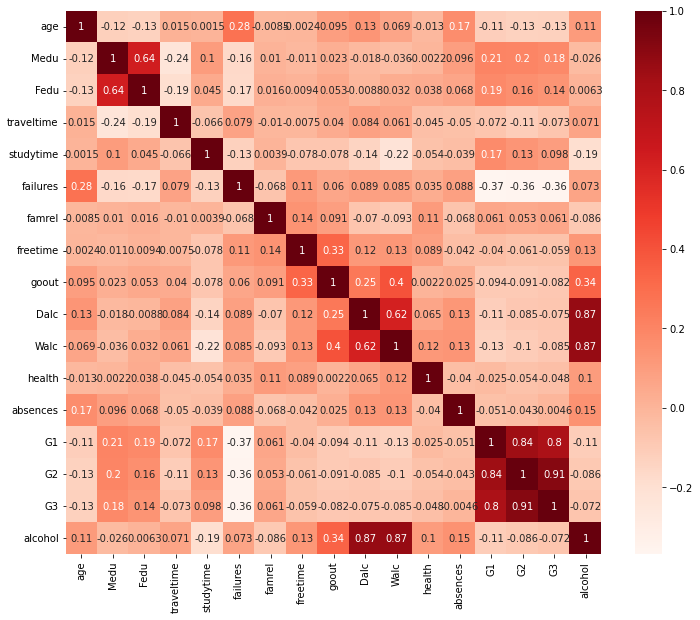

In [11]:
plt.figure(figsize=(12,10))
bh_corr=data_final.corr()
seaborn.heatmap(bh_corr, annot = True , cmap=plt.cm.Reds)

Encoding

In [12]:
nonnumeric_columns =[data_final.columns[index] for index, dtype in enumerate(data_final.dtypes) if dtype== 'object']
nonnumeric_columns

['school',
 'sex',
 'address',
 'famsize',
 'Pstatus',
 'Mjob',
 'Fjob',
 'reason',
 'guardian',
 'schoolsup',
 'famsup',
 'paid',
 'activities',
 'nursery',
 'higher',
 'internet',
 'romantic',
 'course',
 'drinker']

In [13]:
for column in nonnumeric_columns:
  print(f'{column}: {data_final[column].unique()}')

school: ['MS' 'GP']
sex: ['M' 'F']
address: ['U' 'R']
famsize: ['LE3' 'GT3']
Pstatus: ['T' 'A']
Mjob: ['at_home' 'other' 'services' 'teacher' 'health']
Fjob: ['services' 'other' 'at_home' 'health' 'teacher']
reason: ['home' 'course' 'reputation' 'other']
guardian: ['mother' 'father' 'other']
schoolsup: ['no' 'yes']
famsup: ['yes' 'no']
paid: ['no' 'yes']
activities: ['no' 'yes']
nursery: ['no' 'yes']
higher: ['yes' 'no']
internet: ['no' 'yes']
romantic: ['no' 'yes']
course: ['portuguese' 'math']
drinker: ['yes' 'no']


Because in Mjob Fjob reason guardian there is sama "other" function it will be a problem if we get dummies for it so we make it unique first

In [14]:
data_final["Mjob"] = data_final["Mjob"].apply(lambda x: "m_" + x)
data_final["Fjob"] = data_final["Fjob"].apply(lambda x: "f_" + x)
data_final["reason"] = data_final["reason"].apply(lambda x: "r_" + x)
data_final["guardian"] = data_final["guardian"].apply(lambda x: "g_" + x)

In [15]:
data_final

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,course,alcohol,drinker
598,MS,M,18,U,LE3,T,1,2,m_at_home,f_services,r_home,g_mother,2,1,0,no,yes,no,no,no,yes,no,no,4,1,4,5,5,1,8,10,11,11,portuguese,5,yes
439,MS,F,15,R,GT3,T,3,3,m_other,f_services,r_course,g_father,2,1,0,no,no,no,no,no,yes,yes,no,4,1,3,1,1,4,0,14,16,16,portuguese,1,no
193,GP,M,16,R,GT3,T,3,3,m_services,f_services,r_reputation,g_mother,1,1,0,no,yes,no,yes,yes,yes,yes,no,4,3,2,3,4,5,8,8,9,10,math,4,yes
2,GP,F,15,U,LE3,T,1,1,m_at_home,f_other,r_other,g_mother,1,2,3,yes,no,yes,no,yes,yes,yes,no,4,3,2,2,3,3,10,7,8,10,math,3,no
175,GP,M,17,U,LE3,T,4,3,m_teacher,f_other,r_course,g_mother,2,2,0,no,no,yes,yes,yes,yes,yes,no,4,4,4,4,4,4,4,10,9,9,math,4,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
364,MS,F,17,R,GT3,T,1,2,m_other,f_services,r_course,g_father,2,2,0,no,no,no,no,no,yes,no,no,3,2,2,1,2,3,0,12,11,12,math,2,no
539,MS,F,16,U,LE3,T,4,1,m_other,f_other,r_home,g_mother,2,2,0,no,yes,no,yes,yes,yes,yes,no,1,2,4,2,2,1,8,9,10,10,portuguese,2,no
67,GP,F,16,U,GT3,T,3,1,m_services,f_other,r_course,g_mother,1,4,0,yes,yes,yes,no,yes,yes,yes,no,4,3,3,1,2,5,4,7,7,6,math,2,no
435,MS,F,15,R,LE3,T,1,1,m_at_home,f_services,r_reputation,g_father,2,2,0,no,yes,no,no,yes,yes,yes,no,5,4,3,1,2,4,0,10,10,10,portuguese,2,no


In [16]:
dummies = pd.concat([pd.get_dummies(data_final["Mjob"]),
                     pd.get_dummies(data_final["Fjob"]),
                     pd.get_dummies(data_final["reason"]),
                     pd.get_dummies(data_final["guardian"]),
                     ], axis=1)

In [17]:
dummies

,m_at_home,m_health,m_other,m_services,m_teacher,f_at_home,f_health,f_other,f_services,f_teacher,r_course,r_home,r_other,r_reputation,g_father,g_mother,g_other
598,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0
439,0,0,1,0,0,0,0,0,1,0,1,0,0,0,1,0,0
193,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0
2,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0
175,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
364,0,0,1,0,0,0,0,0,1,0,1,0,0,0,1,0,0
539,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0
67,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0
435,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0


In [18]:
data_end = pd.concat([data_final, dummies], axis=1)
data_end.drop(['Mjob', 'Fjob','reason', 'guardian'], axis=1, inplace=True ) 

In [19]:
data_end

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,course,alcohol,drinker,m_at_home,m_health,m_other,m_services,m_teacher,f_at_home,f_health,f_other,f_services,f_teacher,r_course,r_home,r_other,r_reputation,g_father,g_mother,g_other
598,MS,M,18,U,LE3,T,1,2,2,1,0,no,yes,no,no,no,yes,no,no,4,1,4,5,5,1,8,10,11,11,portuguese,5,yes,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0
439,MS,F,15,R,GT3,T,3,3,2,1,0,no,no,no,no,no,yes,yes,no,4,1,3,1,1,4,0,14,16,16,portuguese,1,no,0,0,1,0,0,0,0,0,1,0,1,0,0,0,1,0,0
193,GP,M,16,R,GT3,T,3,3,1,1,0,no,yes,no,yes,yes,yes,yes,no,4,3,2,3,4,5,8,8,9,10,math,4,yes,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0
2,GP,F,15,U,LE3,T,1,1,1,2,3,yes,no,yes,no,yes,yes,yes,no,4,3,2,2,3,3,10,7,8,10,math,3,no,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0
175,GP,M,17,U,LE3,T,4,3,2,2,0,no,no,yes,yes,yes,yes,yes,no,4,4,4,4,4,4,4,10,9,9,math,4,yes,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
364,MS,F,17,R,GT3,T,1,2,2,2,0,no,no,no,no,no,yes,no,no,3,2,2,1,2,3,0,12,11,12,math,2,no,0,0,1,0,0,0,0,0,1,0,1,0,0,0,1,0,0
539,MS,F,16,U,LE3,T,4,1,2,2,0,no,yes,no,yes,yes,yes,yes,no,1,2,4,2,2,1,8,9,10,10,portuguese,2,no,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0
67,GP,F,16,U,GT3,T,3,1,1,4,0,yes,yes,yes,no,yes,yes,yes,no,4,3,3,1,2,5,4,7,7,6,math,2,no,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0
435,MS,F,15,R,LE3,T,1,1,2,2,0,no,yes,no,no,yes,yes,yes,no,5,4,3,1,2,4,0,10,10,10,portuguese,2,no,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0


In [20]:
nonnumeric_columns =[data_end.columns[index] for index, dtype in enumerate(data_end.dtypes) if dtype== 'object']
nonnumeric_columns

for column in nonnumeric_columns:
  print(f'{column}: {data_end[column].unique()}')

school: ['MS' 'GP']
sex: ['M' 'F']
address: ['U' 'R']
famsize: ['LE3' 'GT3']
Pstatus: ['T' 'A']
schoolsup: ['no' 'yes']
famsup: ['yes' 'no']
paid: ['no' 'yes']
activities: ['no' 'yes']
nursery: ['no' 'yes']
higher: ['yes' 'no']
internet: ['no' 'yes']
romantic: ['no' 'yes']
course: ['portuguese' 'math']
drinker: ['yes' 'no']


In [21]:
encoder = LabelEncoder()

for column in nonnumeric_columns:
  data_end[column] = encoder.fit_transform(data_end[column])

In [22]:
for dtype in data_end.dtypes :
  print(dtype)

int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
uint8
uint8
uint8
uint8
uint8
uint8
uint8
uint8
uint8
uint8
uint8
uint8
uint8
uint8
uint8
uint8
uint8


In [23]:
print(data_end['alcohol'])

598    5
439    1
193    4
2      3
175    4
      ..
364    2
539    2
67     2
435    2
371    3
Name: alcohol, Length: 662, dtype: int64


Splitting Data & Scaling Data

In [24]:
train_y = data_end['alcohol']
train_X = data_end.drop(['Walc','Dalc','drinker','alcohol'], axis=1)

scaler = StandardScaler()
train_X = pd.DataFrame(scaler.fit_transform(train_X), columns=train_X.columns)

In [25]:
X_train_full, X_test, y_train_full, y_test = train_test_split(train_X, train_y, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, random_state=42)

Regression for Alcohol Consumption

In [26]:
model = keras.models.Sequential([
    keras.layers.Dense(100, activation="relu", input_shape=train_X.shape[1:]),
    keras.layers.Dense(1)
])
model.compile(loss="mean_squared_error", optimizer=keras.optimizers.SGD(learning_rate=1e-3),metrics=["accuracy"])

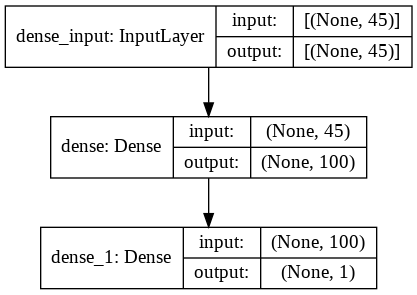

In [27]:
keras.utils.plot_model(model, "my_fashion_mnist_model.png", show_shapes=True)

In [28]:
es = EarlyStopping(monitor="val_loss", mode='min',verbose=1)

history = model.fit(X_train, y_train, epochs=1000,
                    validation_data=(X_valid, y_valid)
                    )

mse_test = model.evaluate(X_test, y_test)

Epoch 1/1000
12/12 [==============================] - 1s 22ms/step - loss: 5.2058 - accuracy: 0.1210 - val_loss: 5.2266 - val_accuracy: 0.1613
Epoch 2/1000
12/12 [==============================] - 0s 3ms/step - loss: 3.5795 - accuracy: 0.1909 - val_loss: 3.8425 - val_accuracy: 0.2177
Epoch 3/1000
12/12 [==============================] - 0s 3ms/step - loss: 2.6668 - accuracy: 0.2688 - val_loss: 3.0368 - val_accuracy: 0.2661
Epoch 4/1000
12/12 [==============================] - 0s 3ms/step - loss: 2.1471 - accuracy: 0.3065 - val_loss: 2.5207 - val_accuracy: 0.2823
Epoch 5/1000
12/12 [==============================] - 0s 3ms/step - loss: 1.8266 - accuracy: 0.3253 - val_loss: 2.2039 - val_accuracy: 0.2984
Epoch 6/1000
12/12 [==============================] - 0s 3ms/step - loss: 1.6362 - accuracy: 0.3441 - val_loss: 1.9990 - val_accuracy: 0.3065
Epoch 7/1000
12/12 [==============================] - 0s 3ms/step - loss: 1.5103 - accuracy: 0.3602 - val_loss: 1.8585 - val_accuracy: 0.3145
Epoch

In [29]:
history.params

{'epochs': 1000, 'steps': 12, 'verbose': 1}

In [30]:
print(history.epoch)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221,

In [31]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

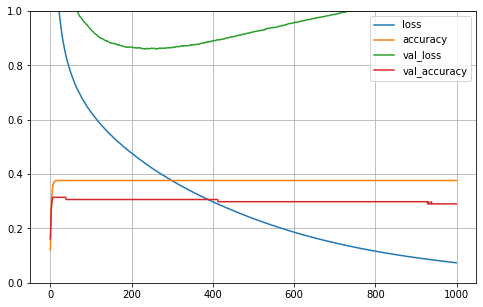

In [32]:
import pandas as pd

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [33]:
X_new = X_test
y_pred = model.predict(X_new)

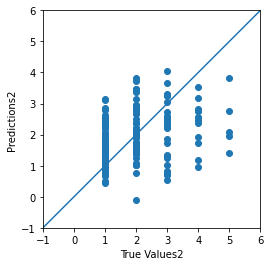

In [34]:
a = plt.axes(aspect='equal')
plt.scatter(y_test, y_pred)
plt.xlabel('True Values2').set_color('black')
plt.ylabel('Predictions2').set_color('black')
lims = [-1,6]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)
plt.tick_params(axis='both', colors='black')

In [35]:
print(y_test[:15])
print(y_pred[:15])

174    1
14     1
481    1
246    1
507    1
435    2
33     1
372    1
194    1
179    1
384    4
152    3
131    2
231    1
426    3
Name: alcohol, dtype: int64
[[2.0868597 ]
 [0.66411036]
 [2.4399338 ]
 [1.7783511 ]
 [1.3428601 ]
 [1.89436   ]
 [1.4622865 ]
 [1.077389  ]
 [1.1370461 ]
 [1.8595873 ]
 [3.165302  ]
 [0.7345775 ]
 [1.4954028 ]
 [2.8022459 ]
 [1.2551715 ]]


Trial classification drinker or not

In [36]:
class_names = ["non drinker", "drinker"]

In [37]:
train_y1 = data_end['drinker']
train_X1 = data_end.drop(['drinker','Dalc','Walc','alcohol'], axis=1)

scaler = StandardScaler()
train_X1 = pd.DataFrame(scaler.fit_transform(train_X1), columns=train_X1.columns)

In [38]:
X_train_full1, X_test1, y_train_full1, y_test1 = train_test_split(train_X1, train_y1, random_state=42)
X_train1, X_valid1, y_train1, y_valid1 = train_test_split(X_train_full1, y_train_full1, random_state=42)

In [39]:
X_train1.shape

(372, 45)

In [40]:
model1 = keras.models.Sequential()
model1.add(keras.layers.Flatten(name="input_layer")) # input layer
model1.add(keras.layers.Dense(450, activation="relu", name="hidden_layer_pertama")) # hidden layer pertama
model1.add(keras.layers.Dense(90, activation="relu", name="hidden_layer_kedua")) # hidden layer kedua
model1.add(keras.layers.Dense(18, activation="relu", name="hidden_layer_ketiga")) # hidden layer ketiga
model1.add(keras.layers.Dense(2, activation="softmax", name="output_layer")) # output layer


model1.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"]
              )

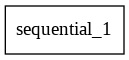

In [41]:
keras.utils.plot_model(model1, "model1.png", show_shapes=True)

In [42]:
es = EarlyStopping(monitor="val_loss", mode='min',verbose=1)

history1 = model1.fit(X_train1, y_train1, epochs=1000,
                    validation_data=(X_valid1, y_valid1)
                    )

mse_test1 = model1.evaluate(X_test1, y_test1)

Epoch 1/1000
12/12 [==============================] - 1s 20ms/step - loss: 0.7524 - accuracy: 0.4301 - val_loss: 0.5800 - val_accuracy: 0.8226
Epoch 2/1000
12/12 [==============================] - 0s 3ms/step - loss: 0.5176 - accuracy: 0.8629 - val_loss: 0.4654 - val_accuracy: 0.8871
Epoch 3/1000
12/12 [==============================] - 0s 4ms/step - loss: 0.4207 - accuracy: 0.9032 - val_loss: 0.4112 - val_accuracy: 0.8871
Epoch 4/1000
12/12 [==============================] - 0s 3ms/step - loss: 0.3707 - accuracy: 0.9032 - val_loss: 0.3871 - val_accuracy: 0.8871
Epoch 5/1000
12/12 [==============================] - 0s 3ms/step - loss: 0.3431 - accuracy: 0.9032 - val_loss: 0.3747 - val_accuracy: 0.8871
Epoch 6/1000
12/12 [==============================] - 0s 5ms/step - loss: 0.3262 - accuracy: 0.9032 - val_loss: 0.3679 - val_accuracy: 0.8871
Epoch 7/1000
12/12 [==============================] - 0s 3ms/step - loss: 0.3133 - accuracy: 0.9032 - val_loss: 0.3636 - val_accuracy: 0.8871
Epoch

In [43]:
history1.params

{'epochs': 1000, 'steps': 12, 'verbose': 1}

In [44]:
print(history1.epoch)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221,

In [45]:
history1.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

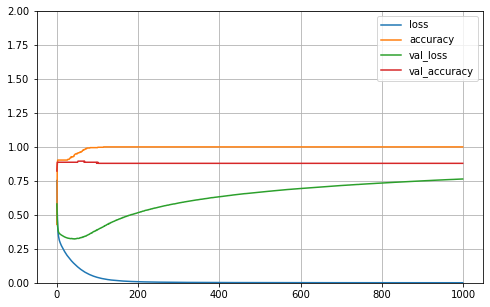

In [46]:
import pandas as pd

pd.DataFrame(history1.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 2)
plt.show()

In [47]:
X_new1 = X_test1[:5]
y_pred1 = model1.predict(X_new1)

In [48]:
print(y_test1[:2])
print(y_pred1)

174    0
14     0
Name: drinker, dtype: int64
[[9.9981564e-01 1.8435429e-04]
 [1.0000000e+00 4.7394827e-10]
 [9.9931204e-01 6.8793050e-04]
 [9.9996841e-01 3.1575601e-05]
 [9.9999905e-01 9.6427652e-07]]


In [49]:
y_pred1 = np.argmax(model1.predict(X_new1), axis=-1)
y_pred1

array([0, 0, 0, 0, 0])

In [50]:
np.array(class_names)[y_pred1]

array(['non drinker', 'non drinker', 'non drinker', 'non drinker',
       'non drinker'], dtype='<U11')